# Introduction

Within the framework of the Machine learning module of the AIC master syllabus, we chose to work on the Otto Group Product classification, which was the object of a Kaggle challenge 3 years ago. As the title indicates, the objective is to build a predictive model which is able to distinguish between the main product categories of the Group. 

The Otto Group is one of the world’s biggest e-commerce companies, with subsidiaries in more than 20 countries, including Crate & Barrel (USA), Otto.de (Germany) and 3 Suisses (France). They sell millions of products worldwide every day, with several thousand products being added to their product line.

According to them, a consistent analysis of the performance of their products is crucial. However, due to their diverse global infrastructure, many identical products get classified differently. Therefore, the quality of their product analysis depends heavily on the ability to accurately cluster similar products. The better the classification, the more insights they can generate about their product range.

In this notebook, we'll present our contribution to solve the above mentioned challenge. We'll start by presenting the data, follow with the exploratory analysis we went through and finally describe the classification process. 


# The data

## Import required packages

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel, SelectKBest, mutual_info_classif
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import os
%matplotlib inline


## Set working directory 

In [3]:
path = os.getcwd()

## Load the data

In [15]:
from IPython.display import display, HTML

def read_data(csvfile):
    df = pd.read_csv(csvfile)
    return df

file = os.path.join(path, "train.csv")
df = read_data(file)
pd.set_option('display.max_columns', 100)
display(df.head())
display(df.tail())

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,5,0,0,0,0,0,2,0,0,0,0,0,1,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,0,0,0,0,2,0,2,0,1,2,1,3,0,0,3,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,Class_1


,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
61873,61874,1,0,0,1,1,0,0,0,0,0,0,1,3,0,0,9,0,2,0,0,0,7,0,3,6,1,0,0,65,1,0,4,3,1,1,1,2,1,0,2,2,2,0,4,0,0,0,8,0,0,0,0,9,7,3,1,0,0,0,1,0,22,0,1,4,11,3,0,0,3,0,1,1,2,0,0,29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,Class_9
61874,61875,4,0,0,0,0,0,0,0,0,0,0,0,4,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,2,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,2,0,0,1,5,0,0,0,0,0,0,0,0,0,1,0,11,0,0,0,0,0,0,2,0,0,2,0,0,1,0,Class_9
61875,61876,0,0,0,0,0,0,0,3,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,19,0,0,4,0,0,0,0,18,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,Class_9
61876,61877,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,2,1,0,0,1,2,0,0,2,1,0,0,5,0,0,0,0,1,2,0,1,0,0,0,1,0,0,0,0,2,1,0,0,1,0,0,0,0,2,0,0,0,0,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,10,0,Class_9
61877,61878,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,1,1,1,0,0,0,3,0,2,1,0,0,0,9,0,0,0,0,0,0,2,0,0,0,0,3,1,0,0,0,0,0,1,0,0,0,0,2,5,1,0,1,0,0,3,0,4,0,0,0,0,10,2,0,0,0,0,0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,Class_9


# Exploratory Data Analysis

## Summary statistics

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


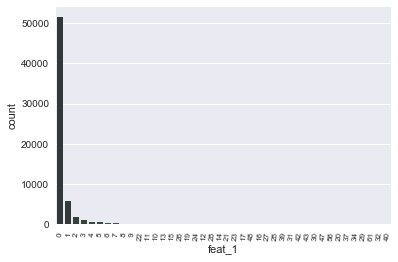

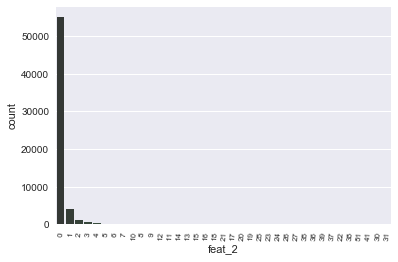

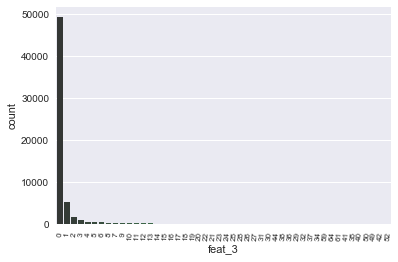

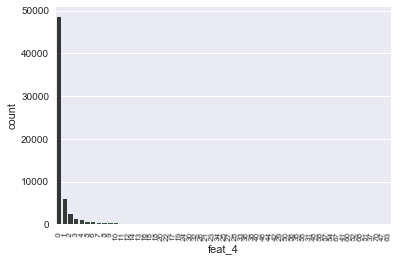

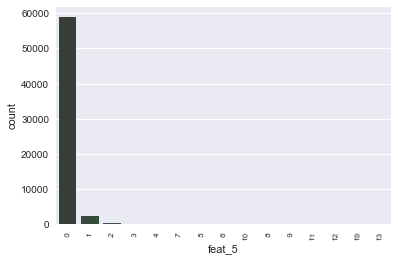

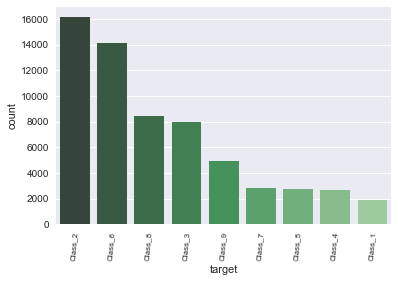

In [5]:
#summary statistics of our data
summary = df.describe()
display(summary)
#count the number of unique levels for each feature as well as for Target 
nb_levels = pd.DataFrame()
cols = df.columns
for j in range(df.shape[1]):
    l = df[cols[j]].unique()
    nb_levels[cols[j]] = pd.Series(len(l))
#distribution of levels for some features
for feat in list(cols[1:6])+[cols[-1]]:
    figName = feat+'.png'
    plt.figure()
    sns.countplot(x=feat, data= df, order = df[feat].value_counts().index, palette="Greens_d")
    plt.xticks(rotation=85, fontsize = 8)
    plt.show()



In [6]:
class_dist = df.groupby('target').agg({'target':'count'}).apply(lambda x: 100 * x / float(x.sum())).sort_values(by='target', ascending=False)
class_dist['target'] =  pd.Series(["{0:.2f}%".format(val) for val in class_dist['target']], index = class_dist.index)
display(class_dist)

,target
target,
Class_2,26.05%
Class_6,22.84%
Class_8,13.68%
Class_3,12.94%
Class_9,8.01%
Class_7,4.59%
Class_5,4.43%
Class_4,4.35%
Class_1,3.12%


We clearly notice that our data has a lot of zeros; all features have a majority of null values. Since we have no idea about the sens of features in our data, we won't be able to figure out what a zero value means. Is it a missing value or a categorical level in itself? 

As for the Target variable (the class), we see that it is imbalanced. Class_2 and class_6 are the most frequent in the data, representing 26% and 22% of the total labels, respectively. Thus, class imbalance should be taken into account when we move to modeling.

## Features Correlation

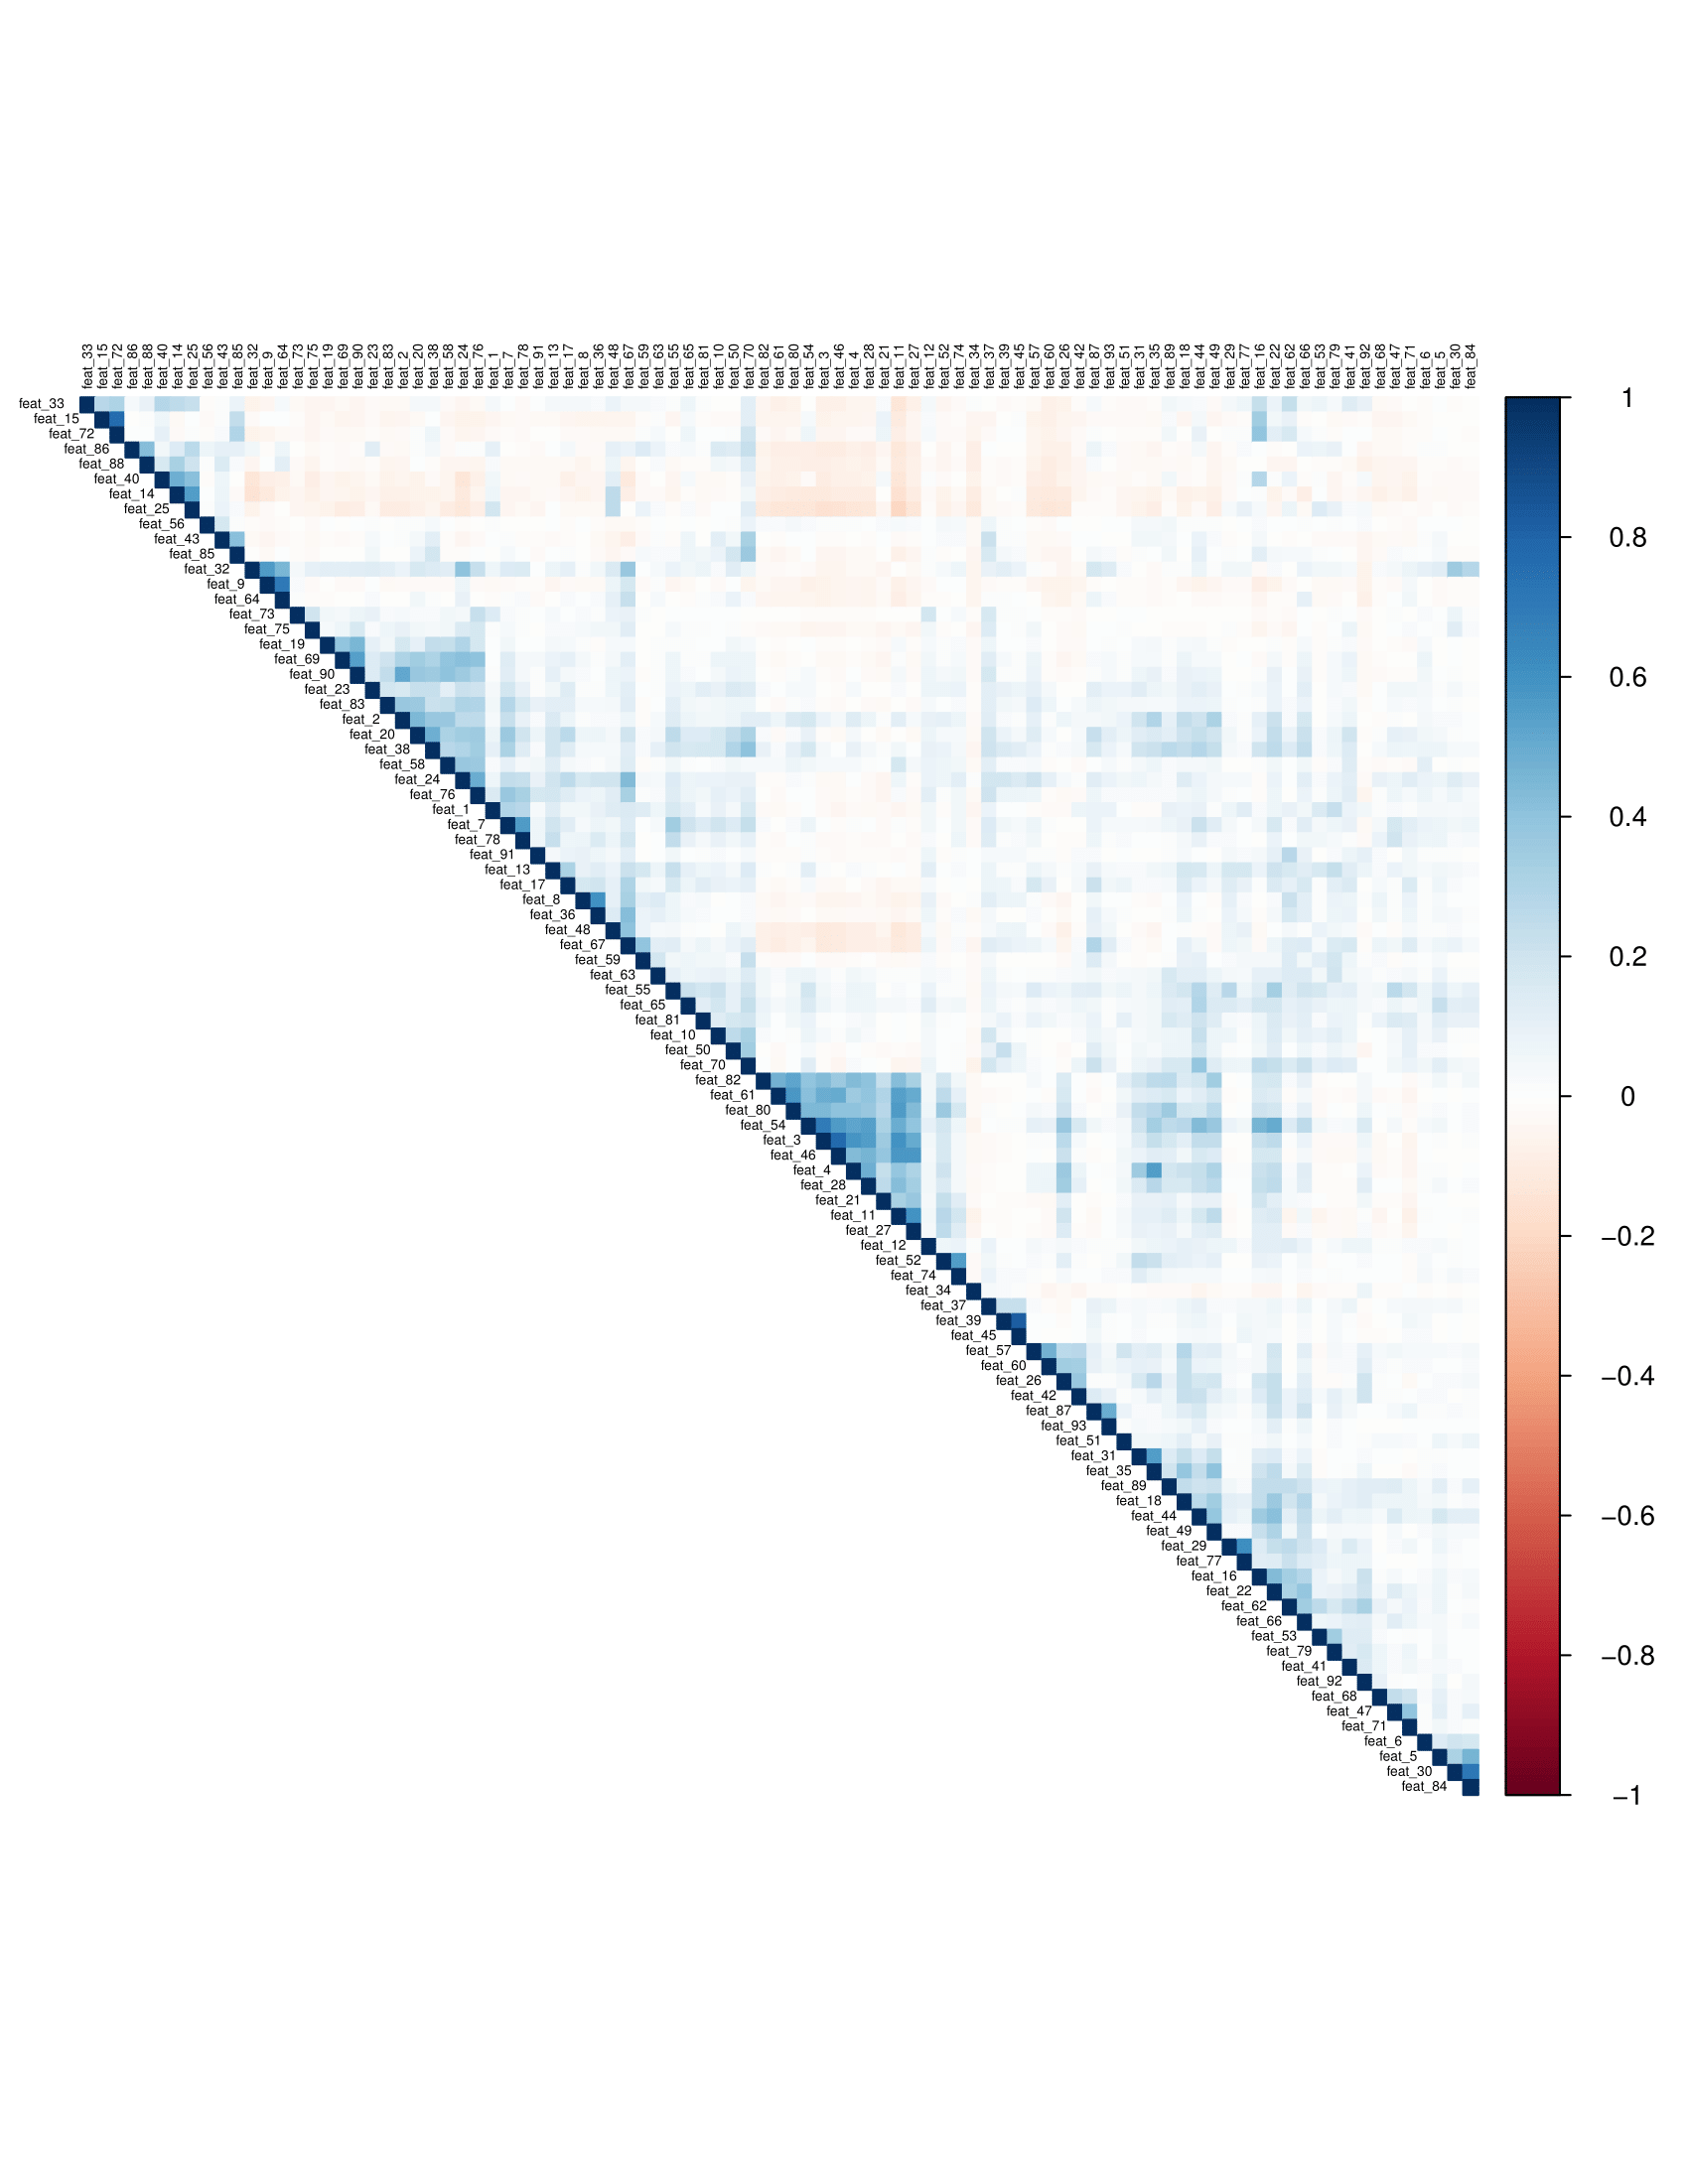

In [25]:
# feature correlation
corr = df[cols[1:-1]].corr()

from IPython.display import Image
Image(os.path.join(path,"EDA","corr_Otto.png"), width=800, height=800)


In [18]:
#maximum correlation between features
#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
oc = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

print("Top 10 highest positive correlation coefficients between features")
max_corr_pos = oc.head(10)
display(max_corr_pos)
print("  ")
print("Top 5 highest negative correlation coefficients between features")
max_corr_neg = oc.tail(5)
display(max_corr_neg)

Top 10 highest positive correlation coefficients between features


feat_39  feat_45    0.824146
feat_3   feat_46    0.777517
feat_15  feat_72    0.764664
feat_30  feat_84    0.716862
feat_9   feat_64    0.702951
feat_3   feat_54    0.694048
feat_29  feat_77    0.612847
feat_8   feat_36    0.606707
feat_11  feat_27    0.599484
feat_3   feat_11    0.596243
dtype: float64

  
Top 5 highest negative correlation coefficients between features


feat_14  feat_32   -0.141330
feat_25  feat_46   -0.142185
feat_11  feat_14   -0.151635
feat_3   feat_25   -0.157459
feat_11  feat_25   -0.206207
dtype: float64

We can see that few features (like feat_39 and feat_45) are **positively and highly correlated**, with a maximum correlation coefficient of 0.82. Thus, we may think of a way to reduce dimensionality of the feature space, albeit no significant information loss occurs. Overall, there is no high negative correlation between features.

## Seperate X and y

In [8]:
#seperate features and target
cols = df.columns
X = df[cols[1:-1]]
y = df[cols[-1]]
print(y.head(10))
#factorize y
y = pd.factorize(y)[0]
y = y+1
print(y[:10])

0    Class_1
1    Class_1
2    Class_1
3    Class_1
4    Class_1
5    Class_1
6    Class_1
7    Class_1
8    Class_1
9    Class_1
Name: target, dtype: object
[1 1 1 1 1 1 1 1 1 1]


Notice that we excluded the **id** column from our features since it's a unique identifier of the product and wouldn't add much information to our analysis.

## PCA transformation

We will try to apply **Principal Component Analysis** on our features to measure the amount of variance principal components could explain.



In [22]:
# try PCA
pca = PCA()
pca.fit(X)
exp_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.zeros(exp_var_ratio.shape)
for i in range(len(cumulative_var_ratio)):
    cumulative_var_ratio[i] = np.sum(exp_var_ratio[0:i+1])
exp_var_ratio = np.concatenate((exp_var_ratio.reshape(1,len(exp_var_ratio)), cumulative_var_ratio.reshape(1,len(cumulative_var_ratio))), axis=0)
pd.set_option('display.max_columns', 100)
display(pd.DataFrame(exp_var_ratio, columns = ['PC_'+str(i+1) for i in range(X.shape[1])], index = ['Proportion of variance', 'Cumulative proportion']))

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50,PC_51,PC_52,PC_53,PC_54,PC_55,PC_56,PC_57,PC_58,PC_59,PC_60,PC_61,PC_62,PC_63,PC_64,PC_65,PC_66,PC_67,PC_68,PC_69,PC_70,PC_71,PC_72,PC_73,PC_74,PC_75,PC_76,PC_77,PC_78,PC_79,PC_80,PC_81,PC_82,PC_83,PC_84,PC_85,PC_86,PC_87,PC_88,PC_89,PC_90,PC_91,PC_92,PC_93
Proportion of variance,0.117721,0.086145,0.063882,0.061287,0.044092,0.039699,0.034891,0.031501,0.029380,0.027462,0.025933,0.022251,0.021618,0.019705,0.019225,0.018607,0.017519,0.017054,0.015499,0.014139,0.012444,0.011826,0.010702,0.010164,0.010007,0.009283,0.008600,0.008264,0.008124,0.007505,0.007442,0.007032,0.006940,0.006742,0.006582,0.00626,0.006071,0.005961,0.005687,0.005479,0.005241,0.004963,0.004814,0.004699,0.004491,0.004046,0.003936,0.003868,0.003655,0.003421,0.003364,0.003146,0.003077,0.002986,0.002765,0.002737,0.002634,0.002506,0.002447,0.002362,0.002338,0.002264,0.002207,0.002073,0.002023,0.001853,0.001804,0.001726,0.001698,0.001593,0.001538,0.001440,0.001431,0.001344,0.001301,0.001241,0.001214,0.001080,0.001026,0.000969,0.000932,0.000876,0.000852,0.000807,0.000762,0.000741,0.000680,0.000661,0.000535,0.000447,0.000335,0.000246,0.000081
Cumulative proportion,0.117721,0.203866,0.267748,0.329035,0.373128,0.412827,0.447718,0.479219,0.508599,0.536061,0.561993,0.584244,0.605863,0.625568,0.644794,0.663401,0.680919,0.697973,0.713473,0.727612,0.740056,0.751881,0.762583,0.772747,0.782754,0.792038,0.800638,0.808902,0.817026,0.824531,0.831973,0.839005,0.845945,0.852687,0.859269,0.86553,0.871600,0.877561,0.883248,0.888726,0.893968,0.898931,0.903745,0.908444,0.912935,0.916981,0.920917,0.924785,0.928440,0.931861,0.935226,0.938371,0.941448,0.944435,0.947199,0.949936,0.952571,0.955076,0.957523,0.959885,0.962223,0.964487,0.966694,0.968767,0.970789,0.972643,0.974447,0.976173,0.977870,0.979463,0.981001,0.982441,0.983872,0.985215,0.986516,0.987757,0.988970,0.990051,0.991077,0.992046,0.992978,0.993854,0.994706,0.995512,0.996274,0.997015,0.997695,0.998356,0.998892,0.999338,0.999674,0.999919,1.000000


We note that **90% of the variance** can be explained by the first **43 principal components**. Thus, a dimensionality reduction is indeed possible!

In [10]:
pca_43 = PCA(43)
X_red = pca_43.fit_transform(X)

In [11]:
X_red.shape

(61878, 43)

## Another feature transformation

We will try out two feature selection techniques using the sklearn functions **SelectFromModel** and **SelectKBest**. For the first one, we will fit a Tree-based classifier whose features importance weights would serve for the selection method. For the second, we will use the mutual information as a selection criterion. 

In [12]:
clf = ExtraTreesClassifier(max_features=None)
clf = clf.fit(X, y)
model1 = SelectFromModel(clf, prefit=True)
idx1 = model1.get_support(indices=True)
X_new_1 = model1.transform(X)   
feat_selected1 = list(X.columns[idx1])
print("%d features selected"%len(feat_selected1))
print('---------------------')
print(feat_selected1)

28 features selected
---------------------
['feat_3', 'feat_8', 'feat_9', 'feat_11', 'feat_14', 'feat_15', 'feat_24', 'feat_25', 'feat_26', 'feat_34', 'feat_36', 'feat_39', 'feat_40', 'feat_42', 'feat_43', 'feat_48', 'feat_60', 'feat_61', 'feat_62', 'feat_64', 'feat_67', 'feat_68', 'feat_69', 'feat_72', 'feat_75', 'feat_86', 'feat_88', 'feat_90']


In [67]:
model2 = SelectKBest(mutual_info_classif, k=40).fit(X,y)
idx2 = model2.get_support(indices=True)
X_new_2 = model2.transform(X) 
feat_selected2 = list(X.columns[idx2])
print("%d features selected"%len(feat_selected2))
print('---------------------')
print(feat_selected2)

40 features selected
---------------------
['feat_2', 'feat_3', 'feat_4', 'feat_8', 'feat_11', 'feat_13', 'feat_14', 'feat_15', 'feat_17', 'feat_20', 'feat_24', 'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_32', 'feat_34', 'feat_35', 'feat_36', 'feat_40', 'feat_42', 'feat_46', 'feat_49', 'feat_54', 'feat_57', 'feat_58', 'feat_60', 'feat_61', 'feat_62', 'feat_67', 'feat_69', 'feat_75', 'feat_76', 'feat_78', 'feat_80', 'feat_82', 'feat_83', 'feat_86', 'feat_88', 'feat_90']


Here we'll look for the common features selected using both methods.

In [50]:
common_feat_selected = [f for f in feat_selected1 if f in feat_selected2]
print("%d common features selected for both methods"%len(common_feat_selected))
print("-------------------------------------------")
print(common_feat_selected)

21 common features selected for both methods
-------------------------------------------
['feat_8', 'feat_11', 'feat_14', 'feat_15', 'feat_24', 'feat_25', 'feat_26', 'feat_34', 'feat_36', 'feat_40', 'feat_42', 'feat_60', 'feat_61', 'feat_62', 'feat_67', 'feat_69', 'feat_75', 'feat_76', 'feat_86', 'feat_88', 'feat_90']


# Predictive Modeling

In [68]:
#spit data into train/test/validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size =0.2, random_state = 42)

In [69]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(39601,)
(12376,)
(9901,)


**Checking class distributions for the 3 sets**

In [70]:
def plot_class_dist(y, label):
    title = 'target_'+label
    total = len(y)
    f = plt.figure()
    ax = sns.countplot(y,  order=[1,2,3,4,5,6,7,8,9], palette="Greens_d")
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total),
                ha="center") 

    plt.xticks(rotation=85, fontsize = 8)
    plt.title(title)
    plt.show()

The above function shows the class distributions for each set. We'll use it to compare them to the initial set's distribution of classes.

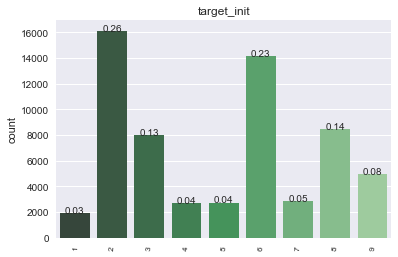

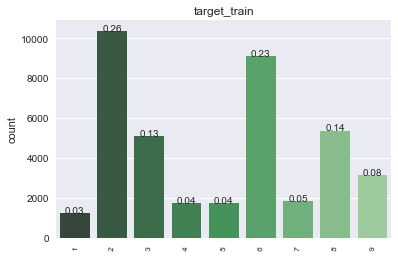

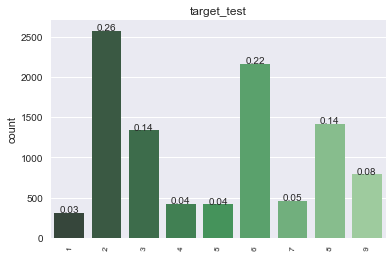

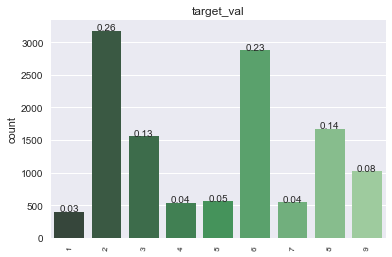

In [71]:
plot_class_dist(y, 'init')
plot_class_dist(y_train, 'train')
plot_class_dist(y_test, 'test')
plot_class_dist(y_val, 'val')

In [22]:
#from sklearn.model_selection import StratifiedShuffleSplit

#X_train = np.asarray(X_train)
#y_train = np.asarray(y_train)
#sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
#for train_index, test_index in sss.split(X_train, y_train):
#    X_train_, X_val_ = X_train[train_index], X_train[test_index]
#    y_train_, y_val_ = y_train[train_index], y_train[test_index]

Now, we are going to try out some classification models using the original features and evaluate the score by cross-validation.

## Performance metric 1 : Mean accuracy

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from scipy import interp

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)

#choose some classification models
models = [KNeighborsClassifier(5), RandomForestClassifier(), LinearSVC(), 
              LogisticRegression(), GradientBoostingClassifier(), MLPClassifier(), 
                                GaussianNB(), QuadraticDiscriminantAnalysis() ]



def train_cv(X, y):
    X = np.array(X)
    y = np.array(y)
    mean_accuracy ={}
    for clf in models:
        i = 0
        accuracy = []
        print(str(clf.__class__.__name__))
        for train, test in cv.split(X,y):
            clf.fit(X[train], y[train])
            y_pred = clf.predict(X[test])
            # Compute balanced accuracy on the test fold
            acc = accuracy_score(y[test], y_pred)
            accuracy.append(acc)
            print('fold %d (acc = %0.2f)' % (i, acc))
            i += 1
        mean_accuracy[clf.__class__.__name__] = np.mean(accuracy)
        
    for key in mean_accuracy.keys():
        mean_accuracy[key] = '%.2f' %mean_accuracy[key]
    return mean_accuracy
    
mean_accuracy_init = train_cv(X,y)   


KNeighborsClassifier
fold 0 (acc = 0.78)
fold 1 (acc = 0.77)
fold 2 (acc = 0.78)
fold 3 (acc = 0.79)
fold 4 (acc = 0.77)
RandomForestClassifier
fold 0 (acc = 0.78)
fold 1 (acc = 0.78)
fold 2 (acc = 0.78)
fold 3 (acc = 0.79)
fold 4 (acc = 0.78)
LinearSVC
fold 0 (acc = 0.75)
fold 1 (acc = 0.74)
fold 2 (acc = 0.75)
fold 3 (acc = 0.75)
fold 4 (acc = 0.75)
LogisticRegression
fold 0 (acc = 0.75)
fold 1 (acc = 0.75)
fold 2 (acc = 0.75)
fold 3 (acc = 0.76)
fold 4 (acc = 0.75)
GradientBoostingClassifier
fold 0 (acc = 0.78)
fold 1 (acc = 0.78)
fold 2 (acc = 0.79)
fold 3 (acc = 0.79)
fold 4 (acc = 0.78)
MLPClassifier
fold 0 (acc = 0.78)
fold 1 (acc = 0.79)
fold 2 (acc = 0.79)
fold 3 (acc = 0.80)
fold 4 (acc = 0.79)
GaussianNB
fold 0 (acc = 0.61)
fold 1 (acc = 0.61)
fold 2 (acc = 0.62)
fold 3 (acc = 0.62)
fold 4 (acc = 0.62)
QuadraticDiscriminantAnalysis
fold 0 (acc = 0.66)
fold 1 (acc = 0.66)
fold 2 (acc = 0.67)
fold 3 (acc = 0.67)
fold 4 (acc = 0.66)


In [26]:
display(pd.DataFrame.from_dict(mean_accuracy_init, orient="index"))

,0
KNeighborsClassifier,0.78
RandomForestClassifier,0.78
LinearSVC,0.75
LogisticRegression,0.75
GradientBoostingClassifier,0.78
MLPClassifier,0.79
GaussianNB,0.61
QuadraticDiscriminantAnalysis,0.66


We'll run the training on the PCA-reduced data. 

In [27]:
models = [KNeighborsClassifier(5), RandomForestClassifier(), LinearSVC(), 
              LogisticRegression(), MLPClassifier()]

mean_accuracy_pca = train_cv(X_red, y)

KNeighborsClassifier
fold 0 (acc = 0.77)
fold 1 (acc = 0.77)
fold 2 (acc = 0.77)
fold 3 (acc = 0.78)
fold 4 (acc = 0.78)
RandomForestClassifier
fold 0 (acc = 0.76)
fold 1 (acc = 0.76)
fold 2 (acc = 0.75)
fold 3 (acc = 0.76)
fold 4 (acc = 0.76)
LinearSVC
fold 0 (acc = 0.73)
fold 1 (acc = 0.73)
fold 2 (acc = 0.73)
fold 3 (acc = 0.73)
fold 4 (acc = 0.73)
LogisticRegression
fold 0 (acc = 0.74)
fold 1 (acc = 0.74)
fold 2 (acc = 0.74)
fold 3 (acc = 0.74)
fold 4 (acc = 0.74)
MLPClassifier
fold 0 (acc = 0.78)
fold 1 (acc = 0.79)
fold 2 (acc = 0.78)
fold 3 (acc = 0.79)
fold 4 (acc = 0.79)


In [28]:
 display(pd.DataFrame.from_dict(mean_accuracy_pca, orient="index"))

,0
KNeighborsClassifier,0.77
RandomForestClassifier,0.76
LinearSVC,0.73
LogisticRegression,0.74
MLPClassifier,0.79


## One-Vs-Rest Classification
## Performance metric 2: ROC AUC

In [29]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

def train_OvR(X, y, clf, filename):
    X = np.array(X)
    y = np.array(y)
    # Binarize the output
    y = label_binarize(y, classes=[1,2,3,4,5,6,7,8,9])
    n_classes = y.shape[1]
    
    # shuffle and split training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,
                                                       random_state=0)

    # Learn to predict each class against the other
    classifier = OneVsRestClassifier(clf)
    if hasattr(clf.__class__, 'predict_proba'):
        y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
    elif hasattr(clf.__class__, 'decision_function'):
        y_score = classifier.fit(X_train, y_train).decision_function(X_test)
    else:
        print('estimator used does not implement decision_function nor predict_proba')
        
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    #roc_auc_weighted = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i], )
        roc_auc[i+1] = auc(fpr[i], tpr[i])
        #roc_auc_weighted [i+1] = roc_auc_score(y_test[:, i], y_score[:, i], average = 'weighted')
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    # Then interpolate all ROC curves at this point
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    # Plot all ROC curves
    f= plt.figure(figsize=(10,10))
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
              color='navy', linestyle=':', linewidth=4)

    colors = ['aqua', 'darkorange', 'cornflowerblue', 'gray', 'goldenrod', 'crimson', 'chocolate', 'yellow', 'mediumspringgreen']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i+1, roc_auc[i+1]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic using '+str(clf.__class__.__name__))
    plt.legend(loc="lower right")
    plt.show()
    f.savefig(os.path.join(path, 'EDA', filename))
    return roc_auc

**RandomForestClassisier + original data**

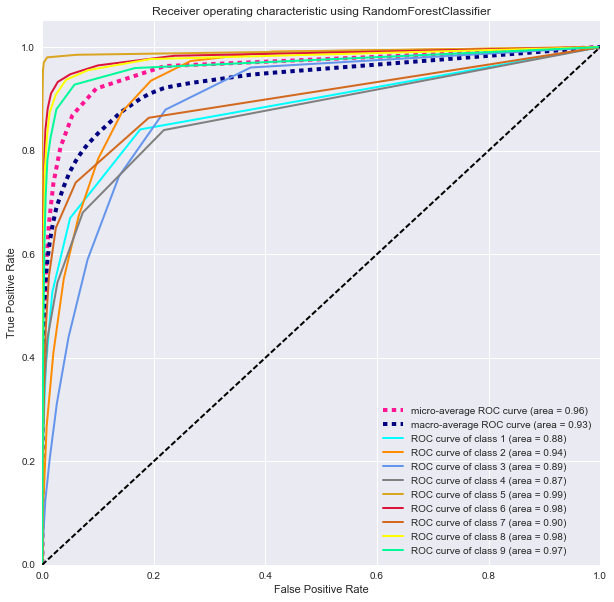

In [30]:
clf = RandomForestClassifier()
roc_auc_rf = train_OvR(X, y, clf, 'ROC_OvR_'+str(clf.__class__.__name__)+'.png')

In [34]:
display(roc_auc_rf)

{1: 0.87285238210606053,
 2: 0.93523005302016626,
 3: 0.89380944683569885,
 4: 0.87281183066173806,
 5: 0.99091354421542632,
 6: 0.98206666859109304,
 7: 0.90443177808591324,
 8: 0.97688044889682024,
 9: 0.96484265395912028,
 'micro': 0.95943024772706398,
 'macro': 0.9326487562635597}

** LinearSVC + original data**

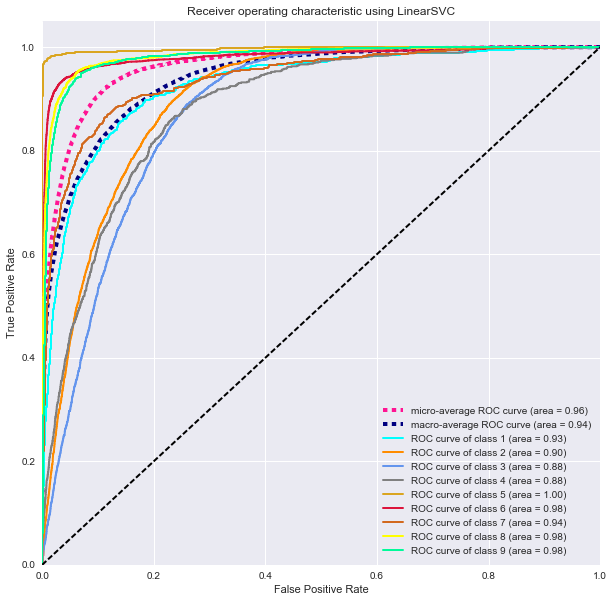

In [36]:
clf = LinearSVC()
roc_auc_svm = train_OvR(X, y, clf, 'ROC_OvR_'+str(clf.__class__.__name__)+'.png')

In [37]:
display(roc_auc_svm)

{1: 0.92772224004473214,
 2: 0.90051085832546407,
 3: 0.87720383301278537,
 4: 0.88455601821463747,
 5: 0.99679741501408536,
 6: 0.98151229207626633,
 7: 0.93975026881435098,
 8: 0.98390895480383656,
 9: 0.98044687756578719,
 'micro': 0.96331194003010179,
 'macro': 0.94141482723855652}

**LinearSVC + Class weight + original data**

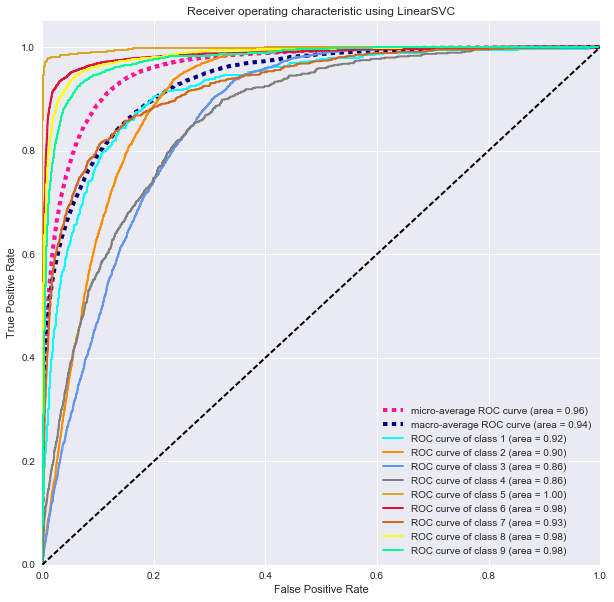

In [40]:
clf = LinearSVC(class_weight = 'balanced')
roc_auc_svm_bal = train_OvR(X, y, clf, 'ROC_OvR_'+str(clf.__class__.__name__)+'.png')

In [41]:
display(roc_auc_svm_bal)

{1: 0.92085820686004771,
 2: 0.9047226936251791,
 3: 0.86157383318417513,
 4: 0.8634670723360337,
 5: 0.99743232799288029,
 6: 0.98426656153498582,
 7: 0.92760574624246894,
 8: 0.98389206560295095,
 9: 0.97668095240487396,
 'micro': 0.96048450162348264,
 'macro': 0.93565105501372237}

**MLPClassifier + original data**

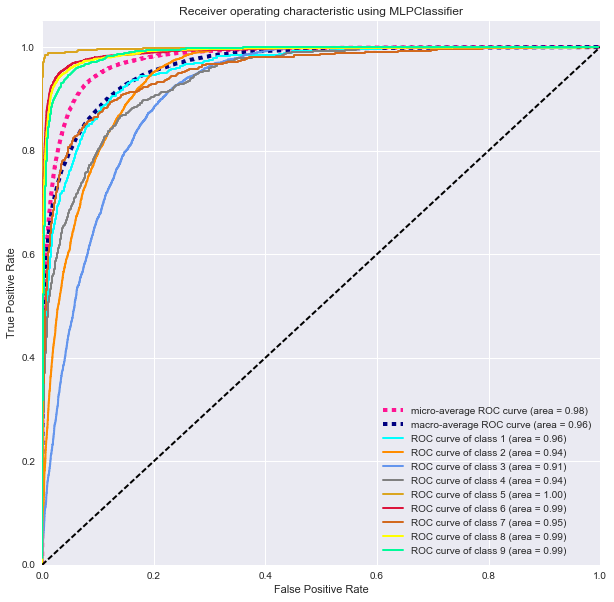

In [38]:
clf = MLPClassifier()
roc_auc_mlp = train_OvR(X, y, clf, 'ROC_OvR_'+str(clf.__class__.__name__)+'.png')

** GaussianNB + original data**

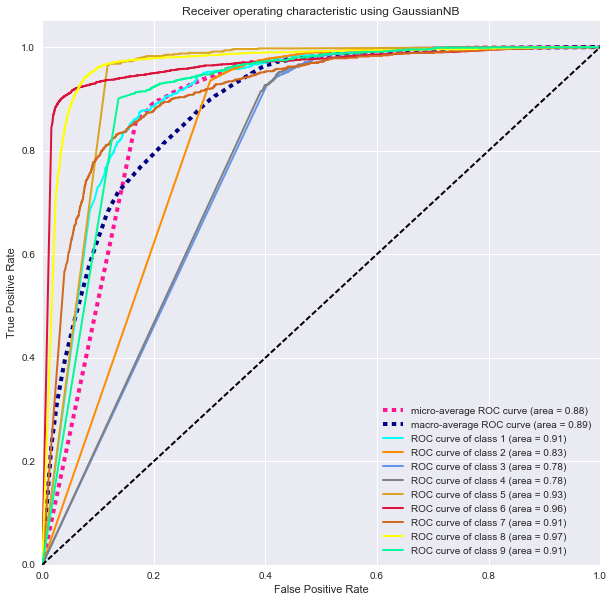

In [35]:
clf = GaussianNB()
roc_auc_gnb = train_OvR(X, y, clf, 'ROC_OvR_'+str(clf.__class__.__name__)+'.png')
    

** LinearSVC + Class weight + PCA data**

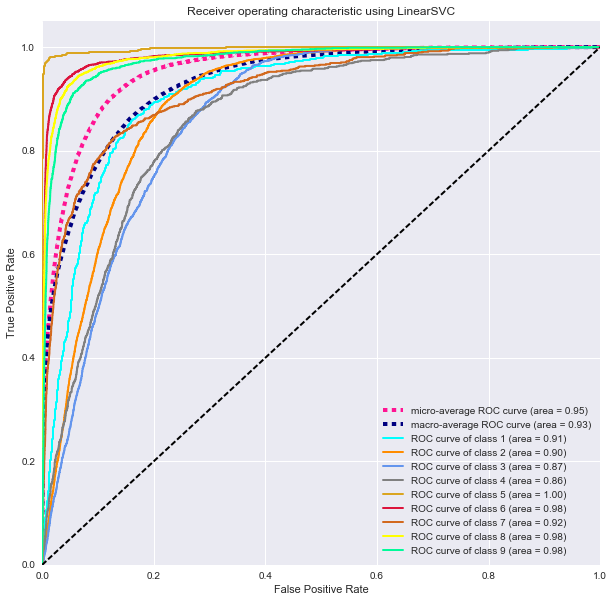

In [47]:
clf = LinearSVC(class_weight = 'balanced')
roc_auc_svm_bal = train_OvR(X_red, y, clf, 'ROC_OvR_'+str(clf.__class__.__name__)+'_using_PCA.png')

In [48]:
display(roc_auc_svm_bal)

{1: 0.90966055513824262,
 2: 0.89504425444372016,
 3: 0.86521830675283551,
 4: 0.86149414382999678,
 5: 0.99709880525673644,
 6: 0.98405088737149193,
 7: 0.9189143341815097,
 8: 0.98209999637458223,
 9: 0.97564162823286538,
 'micro': 0.95489534172237167,
 'macro': 0.93217982564955204}

We can notice that using the PCA-transformed feature space, we don't loose too much information when we use LinearSVC with balanced class weights as a classifier. Thus, for the sake of computation time optimization, one would prefer to use the reduced data rather than the initial one.

**LinearSVC + Class weight + Feature-selected 1 data**

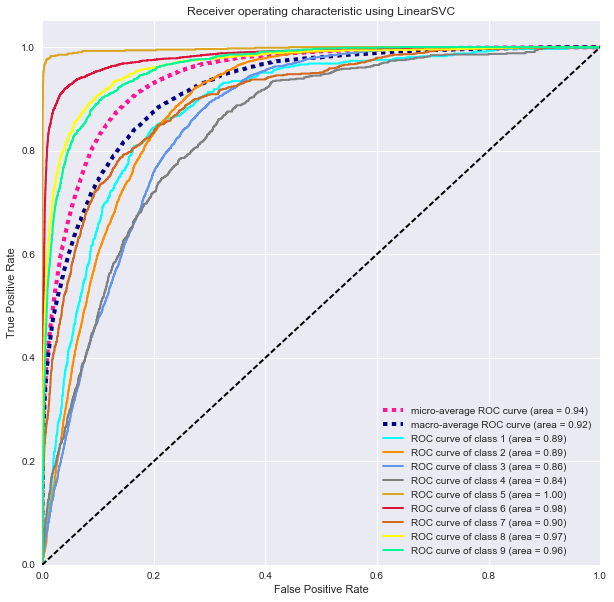

In [52]:
clf = LinearSVC(class_weight = 'balanced')
roc_auc_svm_bal = train_OvR(X_new_1, y, clf, 'ROC_OvR_'+str(clf.__class__.__name__)+'_using_FS.png')

## Voting Classifier
**Creating a voting ensemble model for classification using the VotingClassifier class**

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.
It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

The predictions of the sub-models can be weighted, but specifying the weights for classifiers manually or even heuristically is difficult. More advanced methods can learn how to best weight the predictions from submodels, but this is called stacking (stacked aggregation) and is currently not provided in scikit-learn.

The code below provides an example of combining the predictions of logistic regression, decision trees and support vector machines together for our classification problem.

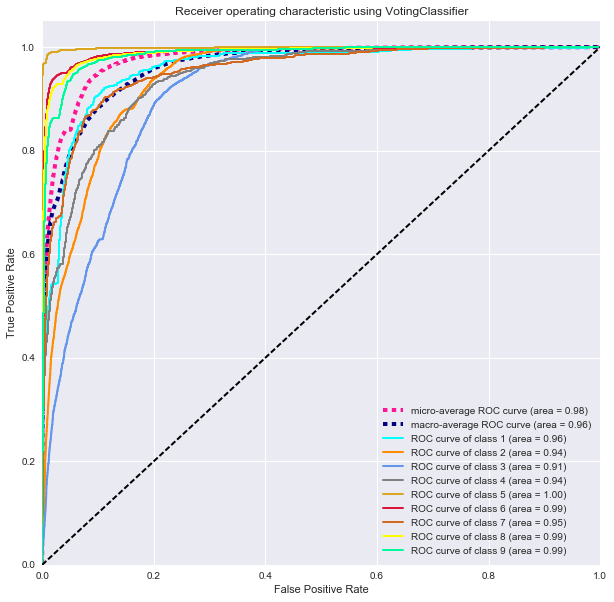

In [110]:
from sklearn.ensemble import VotingClassifier
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('dt', model2))
model3 = MLPClassifier()
estimators.append(('mlp', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators, voting='soft')
roc_auc_ens = train_OvR(X, y, ensemble, 'ROC_OvR_for_voting_clf.png')